### 1 Gathering Miscellaneous Lists - Manual Scraping

For this iteration we do not consider replies to replies. Only the first ones.

Omitted replies include:<br>
<ul>
  <li> Untranslatable tweets (mixture of languages) </li>
  <li> Accounts which are flagged as inactive by BotOMeter </li>
  <li> Replies pointing to a GIF in a foreign language</li>
</ul>
<br>
Explaining The Lists<Br>
<br>
Usernames - Just the usernames of the tweeter<br>
    <br>
Botometer score - The score generated by the bot test software.
Scale - 0 is almost certainly not a bot, 1-2 is unlikely, 2-3 is moderate chance, 3-4 is highly likely, 4-5 is almost certainly a bot<br>
    <br>
In Favour - A broad ternary metric by which it is seen whether a given reply is in favour or against the tweet. Three values are possible, -1 (against), 0 (neutral/inconclusive), 1 (in support)<br>
-1 qualifies in mocking larrourturou, eu, zubair, or showing hostility, defending the arrest, defending the govt, demanding others be arrested.<br>
+1 qualifies in thanking for awareness, support for zubair/larrouturou/eu/etc, decrying the arrest/government/country/state of democracy.<br>
0 qualifies as unknown/inconclusive/neutral.<br>
    <br>
Is repeated reply - Whether this reply is one of many by one individual account. Tests for people spamming replies essentially.<br>
    <br>
Is Hindi - Whether the tweet is in Hindi<br>
    <br>
Profile_Pic_Is_Indian_Flag - Whether the profile picture of a given replying account has the indian flag in some facet as its profile picture.<br>
    <br>
Whataboutism Country - Testing whether a tweet employs whataboutism by appealing to the fact that the original poster is not from India.<br>
Other indicators are Questioning legitimacy of concern (If you're so concerned, come to India/go to jail for him)<br>
Actual examples:
<ul>
    <li>kindly manage ur own country...dont interfere in India...we know wat to do...dont need ur advice</li>
    <li>घर मे झगड़ा होते ही पड़ोसी को डैडी पहले बुलाते है ये लोग ।</li>
    <li>Mind your own business!</li>
    <li>First respect the laws of the land...otherwise even you will go inside...</li>
    <li>Why don't you focus on your territory??</li>
    <li>Why don't you worry about your country and stopping of gas imports from Russia?...</li>
</ul>
    <Br>
Whataboutism Insignificance - indicated by "Who are you to talk" attitudes. Mockery of insignificance of voice.<br>
Actual Examples
<ul>
    <li>And, who are you?</li>
    <li>A lot of tweeple tweet about India to increase their followership</li>
    <li>https://twitter.com/i/status/1541630411637669890 (GIF)</li>
    <li>...But would like to inform that your tweet has made a tremendous impact on the Indian government and they have appraised the Courts about the consequences</li>
    <li>Ok pierre,will free them tmrw happy ?</li>
    <li>Tu kaun be?</li>
    <li>Who are you?</li>
    <li>Journalist? 😂😂😂 And as we say in India, tu kaun be? 😂😂😂</li>
</ul>
        <br>
Questioning legitimacy - Questioning the legitimacy of Mohammed Zubair as a journalist.<br>
Pointing to the tweet where Zubair said that they are not a real journalist.<br>
Actual Examples
<ul>
    <li>Journalist? U must be joking</li>
    <li>Who told you Zubair is a journalist?</li>
    <li>https://pbs.twimg.com/media/FWT8sokaIAApjtS?format=jpg&name=medium</li>
    <li>They, themselves claim they r not journalists,so why r u calling them that?</li>
    <li>You don't worry, real journalists are absolutely safe here.</li>
    <li>Journalist? 😂😂😂 And as we say in India, tu kaun be? 😂😂😂</li>
</ul>
        <br>
Followed by (x) - Whether a replying account is followed by account x, such as Modi.<br>
        I tested this by following these accounts myself, and checking profiles under the "Not followed by anyone you’re following" parameter. <br>
        <br>
Miscellaneous remarks:
        <ul>
            <li>I've noticed two replies in support of Zubair have the following: "[user] is not active, score might be inaccurate". They are also accompanied by Bot scores of over 4.5, which are disregarded as stated above. @AbbasSadiq1975 is a good example of this, it is a suspicious account.</li>
        </ul>
                                                                                        
           
        
     


In [195]:
#All of this is kept together to make sure that the len() of each list is the same, to make sure
#the 10th entry of each list is the same reply

#This is painfully manually laboured, hopefully this won't be common practice
Usernames = ['AteequeKLD','CoolHugs_','mudde_rama','MuhammadXunaid0','shahruk92461711','CHILLPI25037592','alvaromorte04','KMortha','VinodBhandara','mschouhan1990','kesarinakha','kesarinakha','pink_cat_lady','balbir59','AveePDas','World_neptuner','chandrats06','whydisregardus',
            'itssitu','DrAVSriv','uthramthirunal','Rationalleo','PoliticalEagles','pricelesslazy','slamsam18','Mridul66305593','mumukshu62','srrashmi1','swapnilg18','dimaagkoshot','ranji131978','hassan_rizwan14','dharmikninja','qariasadnomani','JaiShri23399269','DeepakK1959',
            'girishbhrdwj','narendranath_ak','punyachimulgi','Vkworld2122','ShankaranJyothi']
Botometer_Scores = [1.4,1.2,0.8,1,3.8,1.6,3.6,0.4,0.6,2.9,1.8,1.8,1.2,0.2,0.6,0.2,0.6,2.6
                   ,0.2,0.5,0.2,0.9,1.7,1,0.8,0.8,0.5,0.9,0.3,1.8,0.4,0.6,0.8,1.5,1,0.8,0.4,1,0.1,
                   1.6,0.6] #score of a given account
In_Favour = [0,1,-1,0,1,-1,0,-1,-1,1,0,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,
            -1,-1,-1,0,-1,0,-1,0,-1,-1,-1,-1,0,-1,-1] #1 yes #-1 no 0 unknown/inconclusive/neutral
Is_repeated_reply = [0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
                    ,0,0,0,0,0,0,0,0,0,0,0,0,0,0] #whether this is one of many tweets from a single user
Is_Hindi = [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]
Profile_Pic_Has_Indian_Flag = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,
                              1]
Whataboutism_Country=[0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
Whataboutism_Appeal_To_Insignificance=[0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,
                                      1,0,0,0,1,0,0,0,1,1,0,0,0,1,1]
Questioning_Legitimacy=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,
                       0,1,0,0,0,0,0,0,0,0,0,0,0,0,1]  
Followed_By_Modi_True=[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
                      ,0,0,0,0,0,0,0]
Followed_By_AmitShah_True=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
                          ,0,0,0,0,0,0,0]

print(len(Usernames),len(Botometer_Scores),len(In_Favour),len(Is_repeated_reply),len(Is_Hindi),
     len(Profile_Pic_Has_Indian_Flag),len(Whataboutism_Country),len(Whataboutism_Appeal_To_Insignificance),
     len(Questioning_Legitimacy),len(Followed_By_Modi_True),len(Followed_By_AmitShah_True))
Botometer_Not_Bot=[item for item in Botometer_Scores if item < 2.5]
Botometer_df= pd.Series(Botometer_Scores)
Botometer_Not_Bot_df=pd.Series(Botometer_Not_Bot)
##we could measure the amount of likes, retweets etc but idk if we have the capabilities to make
##meaningful assessments with it

dict={'Usernames':Usernames,'Botometer_Score':Botometer_Scores,'Hate_Or_Support':In_Favour,
        'Repeatedly_Tweets':Is_repeated_reply,'Hindi_Language':Is_Hindi,
        'Indian_Flag_Profile_Pic':Profile_Pic_Has_Indian_Flag,'Whataboutism_Country':Whataboutism_Country,
       'Whataboutism_Appeal_To_Insignificance':Whataboutism_Appeal_To_Insignificance,'Questioning_Legitimacy':Questioning_Legitimacy,
       'Followed_By_Modi_True':Followed_By_Modi_True,'Followed_By_AmitShah_True':Followed_By_AmitShah_True}

df = pd.DataFrame(dict)

df.to_csv('Larrouturou_Tweet.csv')
    


41 41 41 41 41 41 41 41 41 41 41


### 2 Getting Statistical Numbers

In [196]:
import numpy as np;import matplotlib.pyplot as plt;import seaborn as sns

Mean_Support=sum(In_Favour)/len(In_Favour);print("MEAN SUPPORT",Mean_Support)

Mean_Botometer=sum(Botometer_Scores)/len(Botometer_Scores);print("MEAN BOTOMETER SCORE",Mean_Botometer)

print("STANDARD DEV BOTOMETER SCORE ALL",np.std(Botometer_Scores,ddof=1))
print("SKEWNESS OF BOTOMETER ALL",Botometer_df.skew())

print("________________________________________")
Mean_Botometer_Not_Bot=sum(Botometer_Not_Bot)/len(Botometer_Not_Bot);print("MEAN BOTOMETER SCORE NOT BOTS",Mean_Botometer_Not_Bot)
print("STANDARD DEV BOTOMETER SCORE NOT BOTS",np.std(Botometer_Not_Bot,ddof=1))
print("SKEWNESS OF BOTOMETER ALL NOT BOTS",Botometer_Not_Bot_df.skew())

MEAN SUPPORT -0.5609756097560976
MEAN BOTOMETER SCORE 1.090243902439024
STANDARD DEV BOTOMETER SCORE ALL 0.8734428653463203
SKEWNESS OF BOTOMETER ALL 1.590573482886456
________________________________________
MEAN BOTOMETER SCORE NOT BOTS 0.8594594594594596
STANDARD DEV BOTOMETER SCORE NOT BOTS 0.5096073976108467
SKEWNESS OF BOTOMETER ALL NOT BOTS 0.48382225969523035


### 3 Plotting Data

C:\Users\585hu\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of all Botometer scores'}, xlabel='Score', ylabel='Count, Normalised'>

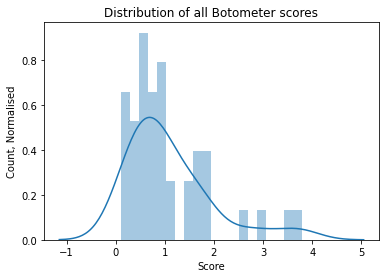

In [197]:
#plt.hist(Botometer_Scores,bins=20)
plt.title("Distribution of all Botometer scores");plt.xlabel("Score");plt.ylabel("Count, Normalised")

sns.distplot(Botometer_Scores,hist=True,kde=True,bins=20)

C:\Users\585hu\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Non Bot Botometer scores'}, xlabel='Score', ylabel='Count, Normalised'>

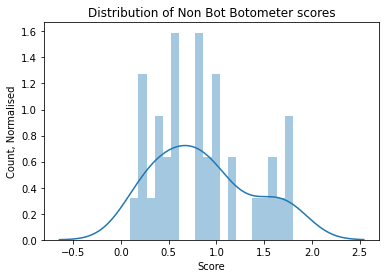

In [198]:
plt.title("Distribution of Non Bot Botometer scores");plt.xlabel("Score");plt.ylabel("Count, Normalised")

sns.distplot(Botometer_Not_Bot,hist=True,kde=True,bins=20)

### 4 Doing some regressions/stats stuff

In [199]:
!pip install statsmodels

In [200]:
import statsmodels.api as sm
X=[Botometer_Scores,Is_repeated_reply,Is_Hindi,Profile_Pic_Has_Indian_Flag,Whataboutism_Country,Whataboutism_Appeal_To_Insignificance,
  Questioning_Legitimacy,Followed_By_Modi_True,Followed_By_AmitShah_True]
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X,cov_type='HAC').fit()
    return results
print(reg_m(In_Favour, X).summary())
#regression of how other lists affect whether an individual is in favour or not. That's the idea anyway

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     4.745
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           0.000661
Time:                        12:58:26   Log-Likelihood:                -27.525
No. Observations:                  41   AIC:                             73.05
Df Residuals:                      32   BIC:                             88.47
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        n

C:\Users\585hu\miniconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['cov_type']
  warnings.warn(msg, ValueWarning)
C:\Users\585hu\miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


### 4 Creating A Class for usernames (Might be useless)

In [201]:
class Username:
    def __init__(self,Username,Botometer_Score,Hate_Or_Support,Repeatedly_Tweets,
                 Hindi_Language,Indian_Flag_Profile_Pic):
        self.Username=Username
        self.Botometer_Score=Botometer_Score
        self.Hate_Or_Support=Hate_Or_Support
        self.Repeatedly_Tweets=Repeatedly_Tweets
        self.Hindi_Language=Hindi_Language
        self.Indian_Flag_Profile_Pic=Indian_Flag_Profile_Pic
    